# Hyper Diffusion equation

The Hyper Diffusion equation is defined as:

$$
\frac{\partial \mathbf{u}}{\partial t}
=\nu \nabla^4 \mathbf{u}
$$

where $\nu$ is viscosity.

## Solution in 1D

In [ ]:
import torch
from torchfsm.mesh import MeshGrid
from torchfsm.plot import plot_traj
from torchfsm.traj_recorder import AutoRecorder
device='cuda' if torch.cuda.is_available() else 'cpu'
L=1.0; N=128; 

In [ ]:
from torchfsm.operator import HyperDiffusion

In [ ]:
hyper_diffusion=-0.0001*HyperDiffusion()
mesh=MeshGrid([(0,L,N)],device=device)
x=mesh.bc_mesh_grid()
u_0=torch.where((x >0.3) & (x < 0.5), 1.0, 0.)
traj=hyper_diffusion.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

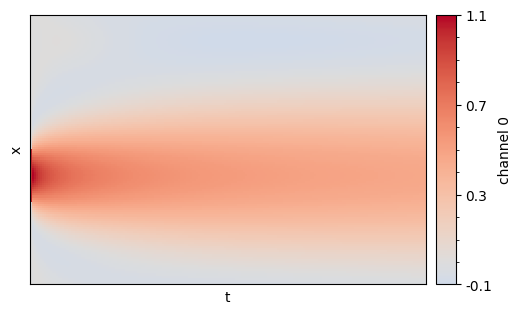

In [ ]:
plot_traj(traj,animation=False)

## Solution in 2D

In [ ]:
mesh=MeshGrid([(0,L,N)]*2,device=device)
x,y=mesh.bc_mesh_grid()
u_0=torch.sin(2*torch.pi*x/L)*torch.cos(4*torch.pi*y/L)
traj=hyper_diffusion.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=50,
    trajectory_recorder=AutoRecorder(),
)

In [ ]:
plot_traj(traj,fps=10)

## Solution in 3D

In [ ]:
from torchfsm.plot import plot_traj, plot_field

In [ ]:
mesh=MeshGrid([(0,L,N)]*3,device=device)
x,y,z=mesh.bc_mesh_grid()
u_0=torch.sin(2*torch.pi*x/L)*torch.cos(4*torch.pi*y/L)*torch.sin(6*torch.pi*z/L)
traj=hyper_diffusion.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.01,
    step=50,
    trajectory_recorder=AutoRecorder(),
)
plot_traj(traj,fps=10)